In [1]:
from jupyter_tools import *
import numpy as np
from einops import rearrange
from utils.aug import augmentations_all, mixings, rotate_xy
from PIL import Image

In [2]:
def _load_mixings():
    mixing_list = list(
            Path('fractals_and_fvis/fractals').rglob('*.jpg'))
    image_size = (22, 96, 96)
    path = np.random.choice(mixing_list)
    image = Image.open(str(path)).convert('L')
    image_resize = image.resize(
        size=(image_size[1] + 10, image_size[2] + 10))

    x_start = np.random.randint(0, 10)
    y_start = np.random.randint(0, 10)
    x_end = x_start + image_size[1]
    y_end = y_start + image_size[2]
    image_crop = image_resize.crop((x_start, y_start, x_end, y_end))
    image_volume = np.stack([np.array(image_crop) / 255
                            for _ in range(image_size[0])])
    return image_volume
    
def aug(image):
    op = np.random.choice(augmentations_all)
    image_aug = op(image, 5)
    print(op)
    return image_aug

def mix(image, mixing):
    mixed_op = np.random.choice(mixings)
    mixed = mixed_op(image, mixing, 3)
    mixed = mixed.clip(0, 1)
    return mixed

In [3]:
listPaths = list(Path("dataset/test").rglob("*.mat"))
listLabel = sorted(set([path.parts[-2] for path in listPaths]))
listIndex = list(range(len(listLabel)))
dictLabel = {name: index for name, index in zip(listLabel, listIndex)}
paths = []
for label in listLabel:
    paths += [list(Path(f'dataset/train/{label}').rglob('*.mat'))[0]]

<function zoom_blur at 0x7f034cab5b40>


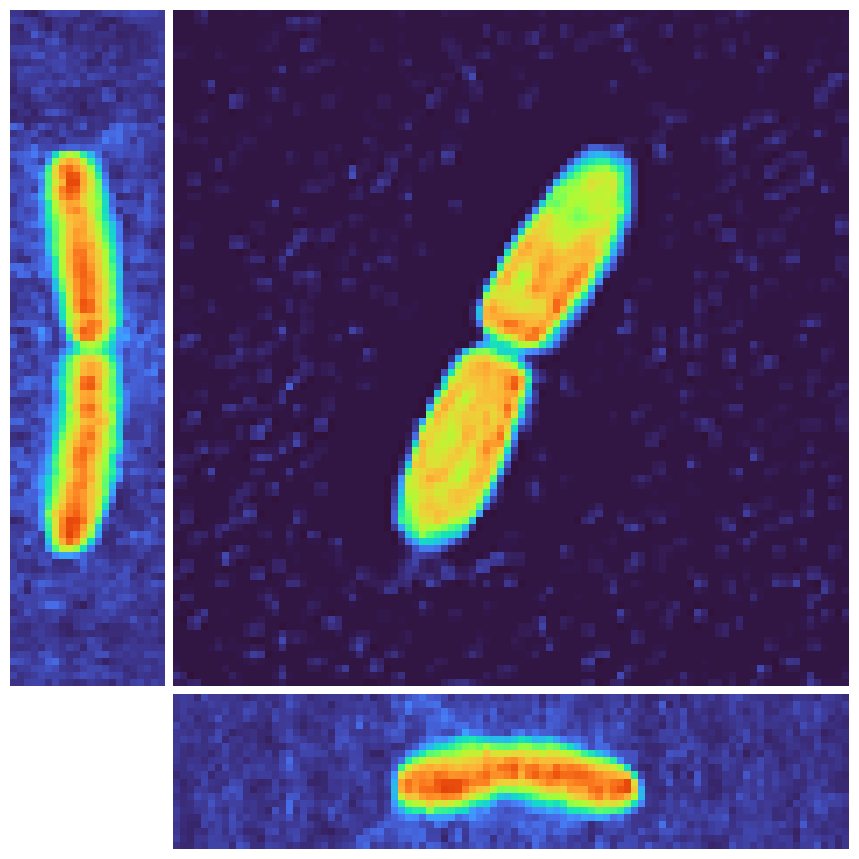

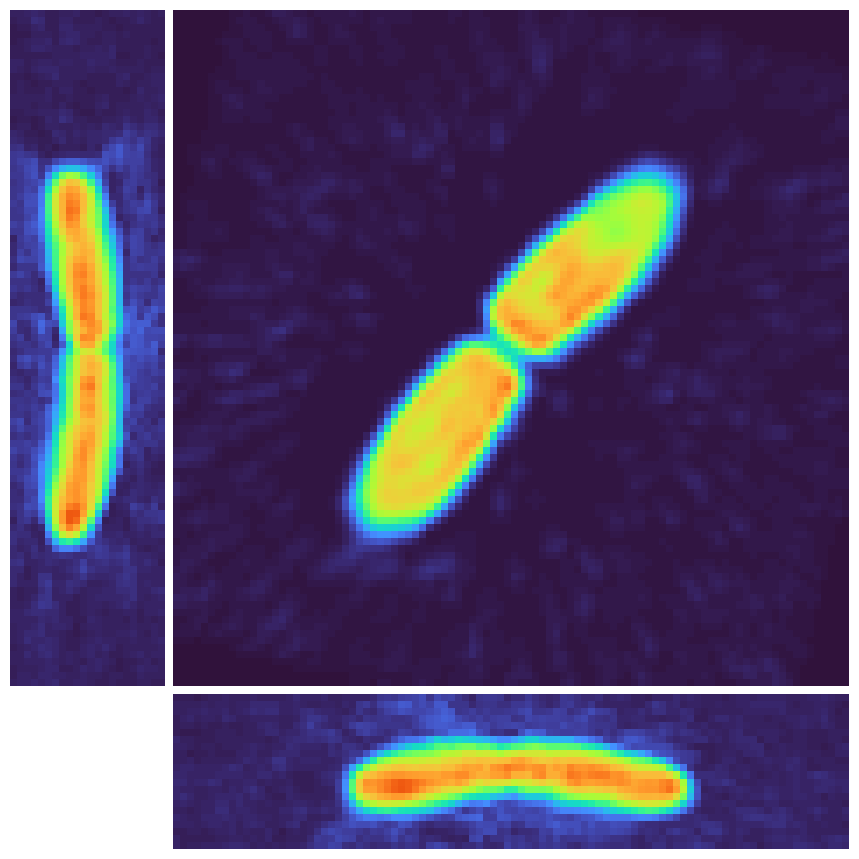

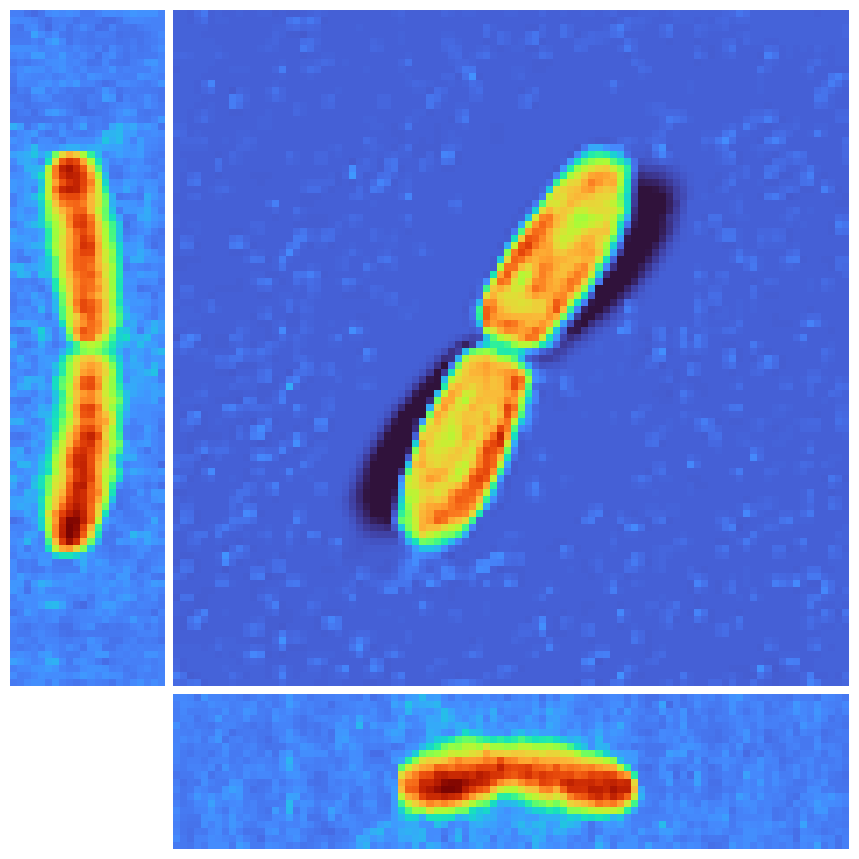

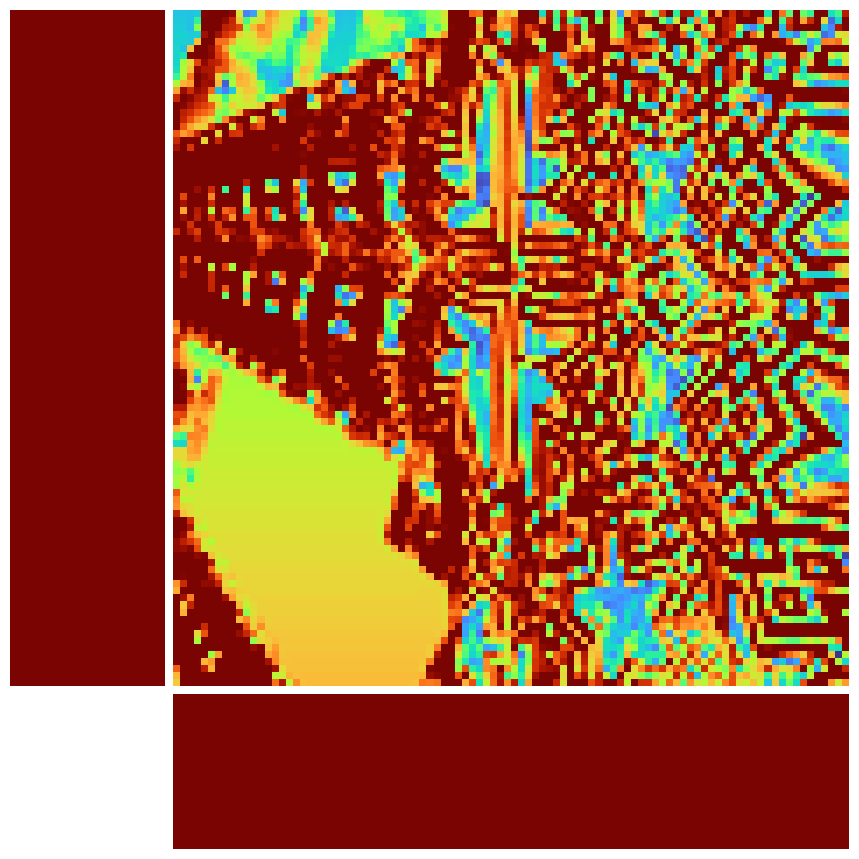

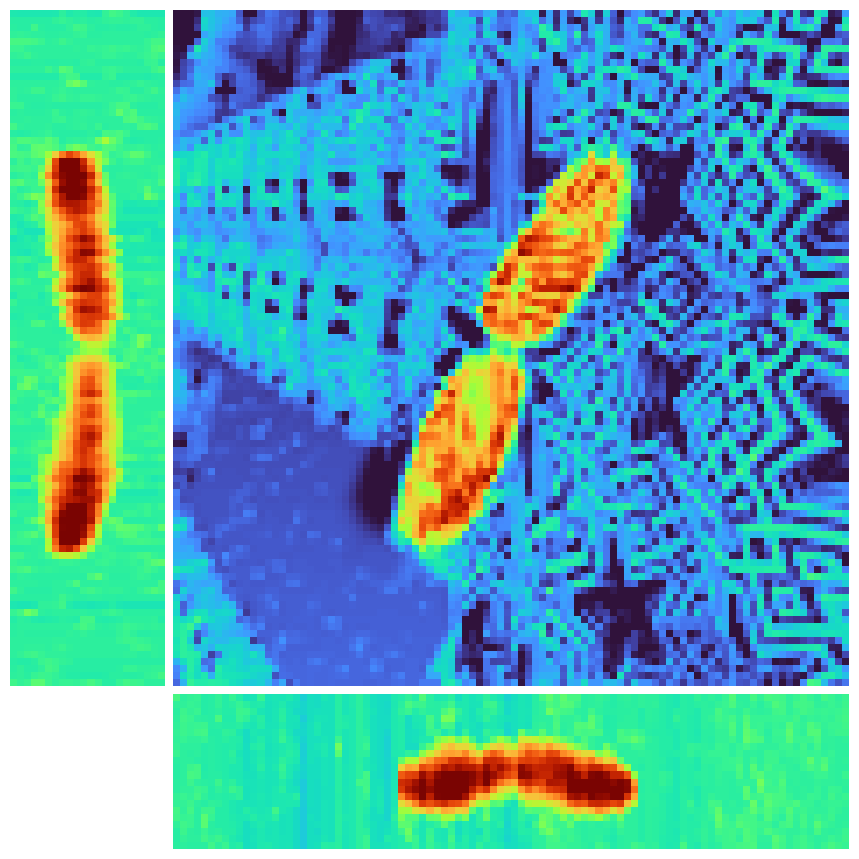

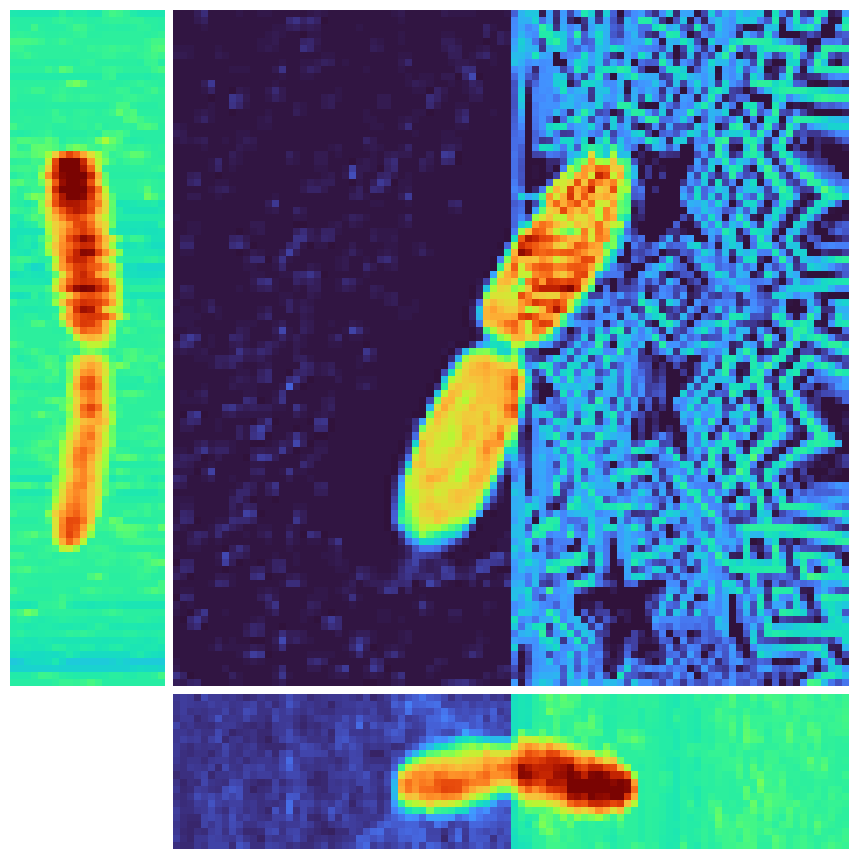

In [178]:
img_origin = norm(rearrange(load_mat(paths[6]), "h w d -> d h w"))[21:-21, 16:-16, 16:-16]
img_corrupted1 = rotate_xy(img_origin, 5)
img_corrupted2 = aug(img_corrupted1)
img_mixed1 = mix(img_origin, img_corrupted2)
img_mixing = _load_mixings()
img_mixed2 = mix(img_mixed1, img_mixing)
img_cutmix = img_mixed2.copy()
img_cutmix[:, :, :48] = img_origin[:, :, :48]
plot_main(img_origin)
# plot_main(img_corrupted1)
plot_main(img_corrupted2)
plot_main(img_mixed1)
plot_main(img_mixing)
plot_main(img_mixed2)
plot_main(img_cutmix)